> Copyright 2025 Giovanni Squillero <<giovanni.squillero@polito.it>>  
> SPDX-License-Identifier: `0BSD`

In [ ]:
from random import choice, randint, random
from itertools import accumulate
from matplotlib import pyplot as plt

In [39]:
def augmented(func):
    class _Augmnented:
        _log: list

        def __init__(self):
            self.clear()

        @property
        def log(self):
            return self._log[:]

        def clear(self):
            self._log = list()

        def plot(self, figsize=(14, 8)):
            plt.figure(figsize=figsize)
            plt.plot(range(len(self._log)), list(accumulate(self._log, max)), color='red')
            plt.scatter(range(len(self._log)), self._log, marker='.', color='lightgray')

        def __call__(self, *args, **kwargs):
            self._log.append(func(*args, **kwargs))
            return self.log[-1]

    return _Augmnented()

In [40]:
# Soluzione: array di PROBLEM_SIZE elementi
# Goal: array di tutti True

PROBLEM_SIZE = 512


@augmented
def fitness(solution):
    return sum(solution)

## Local search (hill-climbing)

In [43]:
## Local search (hill-climbing)
def tweak(sol, p):
    new_sol = sol[:]
    first = True
    while first or random() < p:
        i = randint(0, PROBLEM_SIZE - 1)
        new_sol[i] = not new_sol[i]
        first = False
    return new_sol


fitness.clear()
tries = 0
best_solution = [choice([True, False]) for _ in range(PROBLEM_SIZE)]
while fitness(best_solution) < PROBLEM_SIZE:
    tries += 1
    solution = tweak(best_solution, 0.3)
    if fitness(solution) > fitness(best_solution):
        best_solution = solution[:]

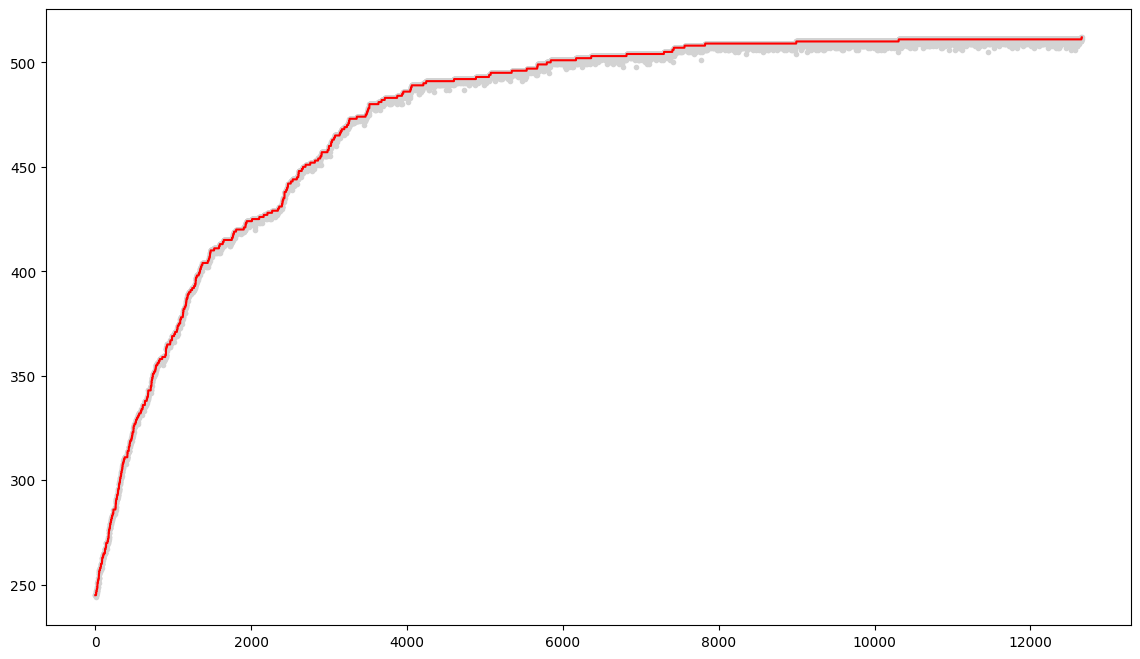

In [44]:
fitness.plot()